In [1]:
import pandas as pd
import geopandas
import mapclassify
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import nuts
import settings
import plotting
from plotting import COLWIDTH, TEXTWIDTH
import eust

In [2]:
nuts_table = nuts.get_nuts_candidates()
EU28_countries = list(nuts_table.country_code.unique())

In [3]:
refareas = ['UAA', 'UAA_XJ2000_J3000']

In [4]:
subnational_quantities = {
    refarea: pd.read_csv(f'outdata/{refarea}/subnational_quantities.csv', index_col='geo')
    for refarea in refareas
}

subnational_rates = {
    refarea: pd.read_csv(f'outdata/{refarea}/subnational_rates.csv', index_col='geo')
    for refarea in refareas
}

national_quantities = {
    refarea: pd.read_csv(f'outdata/{refarea}/national_quantities.csv', index_col='geo')
    for refarea in refareas
}

national_rates = {
    refarea: pd.read_csv(f'outdata/{refarea}/national_rates.csv', index_col='geo')
    for refarea in refareas
}

# Prepare for plotting

In [5]:
nuts_geo = geopandas.read_file(settings.NUTS_GIS_PATH).set_index('NUTS_ID')

def plot_variable_choropleth(s, ax=None, **kwargs):
    key = s.name
    
    d = nuts_geo[['geometry']].join(s, how='inner')
    
    kwargs_final = {
        'legend_kws': {
            'loc': 'upper left',
            'bbox_to_anchor': (1.05, 1.1),
            'borderaxespad': 0,
            'frameon': False,
            'title': 'kg P / ha',
        },
        **plotting.CHOROPLETH_KWS[key],
        **kwargs,
    }
    
    ax = plotting.plot_europe_choropleth(d, key, ax=ax, **kwargs_final)
    return ax

# Plot budget terms

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


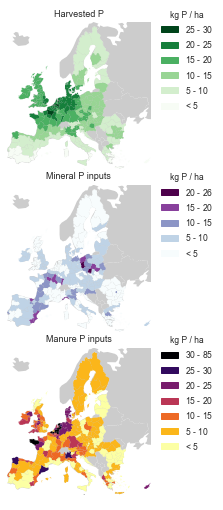

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(COLWIDTH, COLWIDTH * 2.3))

subplots = [
    dict(
        title='Harvested P',
        variable='harvest',
    ),
    dict(
        title='Mineral P inputs',
        variable='mineral',  
    ),
    dict(
        title='Manure P inputs',
        variable='excretion',
    )
]

for ax, sp in zip(axs, subplots):
    variable = sp['variable']
    plot_variable_choropleth(        
        subnational_rates['UAA'][variable].rename(variable),
        ax=ax,
    )
    ax.set_title(sp['title'])
    
plotting.adjust_print_plot(fig, right=0.7)
fig.savefig('outdata/figures/Fig1.pdf')

# Plot surplus with both reference areas

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is t

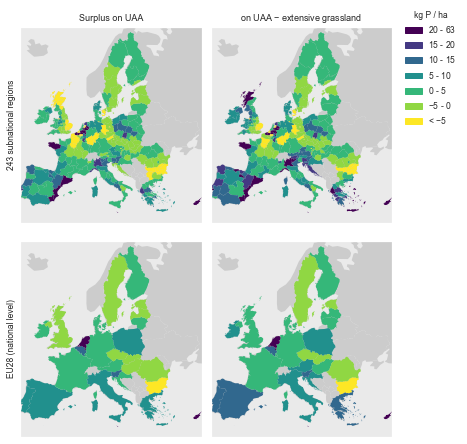

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(TEXTWIDTH, COLWIDTH * 2))

subplots = [
    dict(
        title='Surplus on UAA',
        dataset=subnational_rates['UAA']['surplus'],
        legend=False,
        ylabel=f"{len(subnational_rates['UAA'])} subnational regions",
    ),
    dict(
        title='on UAA $-$ extensive grassland',
        dataset=subnational_rates['UAA_XJ2000_J3000']['surplus'],
        legend=True,   
        ylabel=None,
    ),
    dict(
        title=None,
        dataset=national_rates['UAA']['surplus'],
        legend=False,
        ylabel='EU28 (national level)',
    ),
    dict(
        title=None,
        dataset=national_rates['UAA_XJ2000_J3000']['surplus'],
        legend=False,
        ylabel=None,
    )
]

for ax, sp in zip(axs.flat, subplots):
    plot_variable_choropleth(
        sp['dataset'],
        legend=sp['legend'],
        ax=ax,
    )
    ax.set_title(sp['title'])
    ax.set_ylabel(sp['ylabel'])
    ax.axis('on')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
plotting.adjust_print_plot(fig, right=0.85, left=0.03)
fig.savefig('outdata/figures/Fig2.pdf')

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


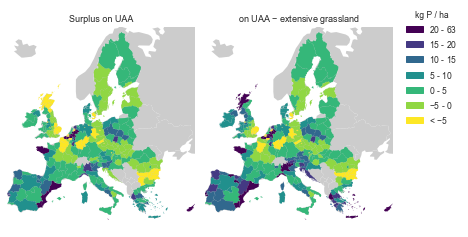

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(TEXTWIDTH, COLWIDTH * 1.1))

subplots = [
    dict(
        title='Surplus on UAA',
        variant='UAA',
        legend=False,
    ),
    dict(
        title='on UAA $-$ extensive grassland',
        variant='UAA_XJ2000_J3000',
        legend=True,        
    )    
]

for ax, sp in zip(axs, subplots):
    plot_variable_choropleth(
        subnational_rates[sp['variant']].surplus,
        legend=sp['legend'],
        ax=ax,
    )
    ax.set_title(sp['title'])
    
plotting.adjust_print_plot(fig, right=0.85)
fig.savefig('outdata/figures/Fig2b.pdf')

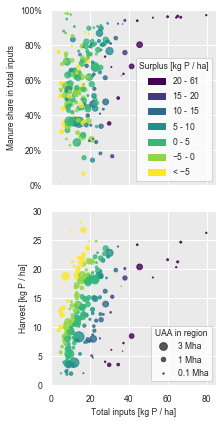

In [9]:
surplus_scheme = mapclassify.UserDefined(
    subnational_rates['UAA'].surplus,
    plotting.CHOROPLETH_KWS['surplus']['bin_uls'],
)
surplus_cmap = plotting.CHOROPLETH_KWS['surplus']['cmap']
surplus_fmt = plotting.CHOROPLETH_KWS['surplus']['legend_fmt']

binned_surplus = (
    pd.Series(
        data=surplus_scheme.yb,
        index=subnational_rates['UAA'].surplus.index,
    )
    .rename('binned_surplus')
)
marker = 'o'
area_scale = 20
alpha = 0.8

scatter_data = (
    subnational_rates['UAA']
    .join(binned_surplus)
    .assign(
        UAA=subnational_rates['UAA'].refarea.mul(area_scale),
        input_sum=lambda d: d.mineral + d.excretion,
        frac_manure=lambda d: d.excretion / d.input_sum
    )
)
scatter_data = scatter_data.sample(len(scatter_data), replace=False) # shuffle randomly

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(COLWIDTH, COLWIDTH * 2))

frac_ax, harvest_ax = axs

axs[1].set_xlabel('Total inputs [kg P / ha]')


harvest_ax.scatter(
    x='input_sum',
    y='harvest',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

harvest_ax.set_ylabel('Harvest [kg P / ha]')
harvest_ax.set_ylim(0, 30)

for ax in axs:
    ax.set_xlim(0, 85)


frac_ax.scatter(
    x='input_sum',
    y='frac_manure',    
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

frac_ax.set_ylabel('Manure share in total inputs')
frac_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
frac_ax.set_ylim(0, 1)

frac_ax.legend(
    handles=plotting.make_legend_handles(surplus_scheme, surplus_cmap, fmt=surplus_fmt),
    title='Surplus [kg P / ha]',
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(1, 0),
    loc='lower right',
)

reference_areas = [0.1, 1, 3]
size_patches = [
    mpl.lines.Line2D(
        markersize=(area * area_scale)**0.5,
        lw=0,
        marker=marker,
        xdata=[],
        ydata=[],
        color='#303030',
        alpha=alpha,
        label=f'{area:,g} Mha',
    )
    for area in reference_areas
]

harvest_ax.legend(
    handles=size_patches[::-1],
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(1, 0),
    loc='lower right',
    title="UAA in region",
)


plotting.adjust_print_plot(fig, left=0.21, right=0.975, bottom=0.1, hspace=0.15)

fig.savefig('outdata/figures/Fig3.pdf')

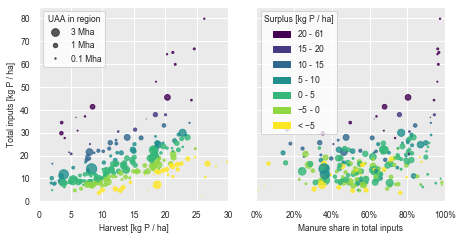

In [10]:
surplus_scheme = mapclassify.UserDefined(
    subnational_rates['UAA'].surplus,
    plotting.CHOROPLETH_KWS['surplus']['bin_uls'],
)
surplus_cmap = plotting.CHOROPLETH_KWS['surplus']['cmap']
surplus_fmt = plotting.CHOROPLETH_KWS['surplus']['legend_fmt']

binned_surplus = (
    pd.Series(
        data=surplus_scheme.yb,
        index=subnational_rates['UAA'].surplus.index,
    )
    .rename('binned_surplus')
)
marker = 'o'
area_scale = 20
alpha = 0.8

scatter_data = (
    subnational_rates['UAA']
    .join(binned_surplus)
    .assign(
        UAA=subnational_rates['UAA'].refarea.mul(area_scale),
        input_sum=lambda d: d.mineral + d.excretion,
        frac_manure=lambda d: d.excretion / d.input_sum
    )
)
scatter_data = scatter_data.sample(len(scatter_data), replace=False) # shuffle randomly

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(TEXTWIDTH, COLWIDTH * 1.1))

harvest_ax, frac_ax = axs

axs[0].set_ylabel('Total inputs [kg P / ha]')


harvest_ax.scatter(
    x='harvest',
    y='input_sum',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

harvest_ax.set_xlabel('Harvest [kg P / ha]')
harvest_ax.set_xlim(0, 30)

for ax in axs:
    ax.set_ylim(0, 85)


frac_ax.scatter(
    x='frac_manure',
    y='input_sum',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

frac_ax.set_xlabel('Manure share in total inputs')
frac_ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
frac_ax.set_xlim(0, 1)

frac_ax.legend(
    handles=plotting.make_legend_handles(surplus_scheme, surplus_cmap, fmt=surplus_fmt),
    title='Surplus [kg P / ha]',
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(0, 1),
    loc='upper left',
)

reference_areas = [0.1, 1, 3]
size_patches = [
    mpl.lines.Line2D(
        markersize=(area * area_scale)**0.5,
        lw=0,
        marker=marker,
        xdata=[],
        ydata=[],
        color='#303030',
        alpha=alpha,
        label=f'{area:,g} Mha',
    )
    for area in reference_areas
]

harvest_ax.legend(
    handles=size_patches[::-1],
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(0, 1),
    loc='upper left',
    title="UAA in region",
)


plotting.adjust_print_plot(fig, left=0.08, right=0.975, bottom=0.15, wspace=0.15)

fig.savefig('outdata/figures/Fig3b.pdf')

# Compare to van Dijk et al (2016) and to Eurostat's budgets

In [11]:
# From Fig. 4 in van Dijk et al. (2016) Sci. Tot. Env. 542 pp. 1078-1093
vanDijk_surplus = (
    pd.Series(
        {
            'BE': 23.2,
            'NL': 21.9,
            'PT': 13.2,
            'DK': 10.1,
            'ES': 9.0,
            'IT': 7.5,
            'PL': 7.4,
            'FI': 7.4,
            'IE': 6.7,
            'LU': 6.1,
            'EL': 5.9,
            'UK': 4.2,
            'FR': 3.8,
            'DE': 1.8,
            'LT': 0.8,
            'SE': 0.5,
            'BG': -0.1,
            'AT': -0.1,
            'SI': -0.4,
            'LV': -0.9,
            'HU': -1.0,
            'EE': -1.1,
            'CZ': -2.1,
            'SK': -2.8,
        }
    )
    .rename('van Dijk et al.')
    .rename_axis('geo')
)

In [12]:
eurostat_gnb = (
    eust
    .read_table_data('aei_pr_gnb')
    .value
    .xs(settings.DATA_YEAR, level='time')
    .xs('P', level='nutrient')
    .unstack('indic_ag')
)

eurostat_surplus = (
    eurostat_gnb
    .eval('BAL / UAA')
    .rename('Eurostat')
)

In [13]:
def abbr_country(d, key='country'):
    return d.replace({key: {'United Kingdom': 'UK', 'Czech Republic': 'Czech Rep.'}})

national_comparison_data = (
    eurostat_surplus.to_frame()
    .join(national_rates['UAA'].surplus.rename('Whole UAA'), how='inner')
    .join(national_rates['UAA_XJ2000_J3000'].surplus.rename('Excl. extensive grass'), how='inner')
    .join(vanDijk_surplus)
    .rename_axis('source', axis=1)
    .assign()
    .stack()
    .rename('surplus')
    .reset_index()
    .join(nuts_table['country'], on='geo')
    .pipe(abbr_country)
    .set_index(['source', 'geo'])
    .sort_values('surplus')
    .reindex(
        [
            'Whole UAA',
            'Excl. extensive grass',
            'Eurostat',
            'van Dijk et al.',
        ],
        level='source'
    )
    .reset_index()
)

national_comparison_data

,source,geo,surplus,country
0,Whole UAA,BG,-5.8468,Bulgaria
1,Whole UAA,CZ,-3.3078,Czech Rep.
2,Whole UAA,UK,-2.3163,UK
3,Whole UAA,SK,-1.8035,Slovakia
4,Whole UAA,EE,-1.7466,Estonia
...,...,...,...,...
103,van Dijk et al.,ES,9.0000,Spain
104,van Dijk et al.,DK,10.1000,Denmark
105,van Dijk et al.,PT,13.2000,Portugal
106,van Dijk et al.,NL,21.9000,Netherlands


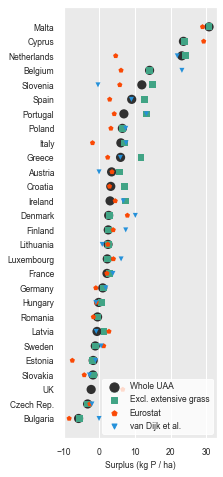

In [14]:
fig, ax = plt.subplots(figsize=(COLWIDTH, COLWIDTH * 2.2))

# Plot the national average surpluses
sns.scatterplot(
    x='surplus',
    y='country',
    hue='source',
    style='source',
    size='source',
    data=national_comparison_data,
    ax=ax,
    palette={
        'Whole UAA': '#303030',
        'Excl. extensive grass': sns.set_hls_values('#66c2a5', l=0.45),
        'Eurostat': sns.set_hls_values('#fc8d62', l=0.5),
        'van Dijk et al.': sns.set_hls_values('#1f78b4', l=0.5),
    },
    sizes={
        'Whole UAA': 85,
        'Excl. extensive grass': 45,
        'Eurostat': 30,
        'van Dijk et al.': 25,
    },
    markers={
        'Whole UAA': 'o',
        'Excl. extensive grass': 's',
        'Eurostat': 'p',
        'van Dijk et al.': 'v',
    },
    linewidth=0,
)

ax.set_ylabel(None)
ax.set_xlabel('Surplus (kg P / ha)')
ax.grid(True, axis='x')
ax.grid(False, axis='y')
ax.set_xlim(-10, 33)

# Hack to remove seaborn's legend title which is added as a legend entry
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc='lower right')
legend = ax.get_legend()
legend.get_frame().set_color('#ffffff')
legend.get_frame().set_alpha(0.8)

plotting.adjust_print_plot(fig, left=0.27, bottom=0.08, right=0.98, top=0.99)

fig.savefig('outdata/figures/Fig4.pdf')

# List some areas with large surpluses or deficits

In [15]:
substantial_area = subnational_rates['UAA'].refarea > 0.1
surplus_subset = (
    subnational_rates['UAA']
    .loc[substantial_area]
)

In [16]:
surplus_subset.loc[lambda s: s.surplus > 20]

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BE23,24.1903,41.6501,2.6044,20.0641,0.1487
BE25,24.6364,64.0720,2.6043,42.0399,0.2035
CY00,4.0489,20.3489,7.3264,23.6265,0.1093
ES51,8.4781,28.0933,13.2637,32.8790,1.1253
ES52,3.5273,10.4824,19.2983,26.2533,0.6377
ES62,3.5707,17.1243,17.3019,30.8554,0.3759
FR52,20.3737,36.5294,8.9330,25.0887,1.6437
NL21,21.6121,57.7545,2.1564,38.2987,0.1987
NL22,21.2358,62.9552,2.1564,43.8758,0.2324


In [17]:
surplus_subset.loc[lambda s: s.surplus < -5]

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BG31,12.1069,1.6414,3.7236,-6.7419,0.9368
BG32,13.3204,2.6520,3.4222,-7.2462,0.7934
BG33,12.8782,2.4118,2.3136,-8.1528,0.8222
BG34,10.0409,2.8785,2.0727,-5.0896,0.8452
BG41,9.4887,2.8369,0.8863,-5.7656,0.5545
CZ04,14.4948,4.1852,4.1398,-6.1698,0.3124
DE7,20.2428,9.4027,4.4992,-6.3409,0.7719
DEB,19.6868,7.0395,6.3646,-6.2826,0.7069
DEE,21.1843,6.9917,8.3388,-5.8538,1.1728


In [18]:
deficit_but_high_inputs = (
    subnational_rates['UAA']
    .loc[lambda d: d.surplus < 0]
    .loc[lambda d: (d.excretion + d.mineral) > 15]
)
deficit_but_high_inputs

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BE24,24.7626,16.7431,2.6043,-5.4152,0.0852
BE31,28.0804,9.4750,5.7800,-12.8254,0.0595
BE32,24.8081,17.2778,5.7800,-1.7503,0.2032
DE8,21.3556,7.0259,12.1311,-2.1986,1.3410
DED,18.6745,9.4597,7.8516,-1.3633,0.9066
DEE,21.1843,6.9917,8.3388,-5.8538,1.1728
DEG,20.8472,8.2067,8.2436,-4.3968,0.7807
DK01,21.0434,11.7082,5.1925,-4.1427,0.0985
FR10,22.5943,1.0643,15.4355,-6.0945,0.5716


In [19]:
deficit_but_high_inputs.refarea.sum()

18.0656

# List France example

In [20]:
(
    subnational_rates['UAA']
    .loc['FR':'FRX']
    .round(1)
    .join(nuts_table)
    .sort_values('surplus')
    .dropna()
)

,harvest,excretion,mineral,surplus,refarea,country_code,nuts_level,label,parent_geo,country
geo,,,,,,,,,,
FR22,26.7,5.9,10.6,-10.3,1.3,FR,2,Picardie,FR2,France
FR10,22.6,1.1,15.4,-6.1,0.6,FR,2,Île de France,FR1,France
FR30,23.6,13.3,5.3,-5.0,0.8,FR,2,Nord - Pas-de-Calais,FR3,France
FR24,19.0,4.4,11.5,-3.1,2.3,FR,2,Centre,FR2,France
FR26,18.0,9.6,5.9,-2.5,1.7,FR,2,Bourgogne,FR2,France
FR43,16.8,12.5,3.2,-1.1,0.7,FR,2,Franche-Comté,FR4,France
FR21,21.3,5.4,15.3,-0.6,1.5,FR,2,Champagne-Ardenne,FR2,France
FR62,13.8,8.7,5.1,0.0,2.5,FR,2,Midi-Pyrénées,FR6,France
FR23,22.1,11.0,11.5,0.4,0.8,FR,2,Haute-Normandie,FR2,France


# Compare reference areas to Eurostat

In [21]:
(
    eurostat_gnb
    .UAA
    .rename('GNB_UAA')
    .div(1e3)
    .to_frame()
    .join(national_quantities['UAA'].refarea.rename('UAA'))
    .assign(percent_difference=lambda d: (d.GNB_UAA / d.UAA - 1) * 100)
    .round(1)
)

,GNB_UAA,UAA,percent_difference
geo,,,
AT,2.9,2.7,5.0
BE,1.3,1.3,2.4
BG,5.0,4.7,7.4
CH,1.5,NaN,NaN
CY,0.1,0.1,-2.1
CZ,3.5,3.5,0.8
DE,16.7,16.7,-0.1
DK,2.6,2.6,0.3
EE,0.9,1.0,-1.0


# Regions with surplus heavily affected by reference area choice

In [22]:
surplus_diff = (
    subnational_rates['UAA_XJ2000_J3000'].surplus
    - subnational_rates['UAA'].surplus
).rename('diff')
(
    surplus_diff
    .loc[lambda s: s.abs() > 10]
)

geo
AT32    10.7046
AT33    13.5220
EL21    31.0094
EL41    15.5167
EL42    24.6947
EL43    20.7463
ES13    12.0803
ES23    11.1998
ES70    14.5339
HR03    16.2561
ITC2    12.0734
ITH1    15.3873
ITH2    37.7100
UKD1    10.9219
UKM2    10.9701
UKM3    12.1489
UKM6    38.9913
Name: diff, dtype: float64

In [23]:
(
    surplus_diff
    .loc[lambda s: s.abs() > 5]
    .pipe(len)
)

41

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


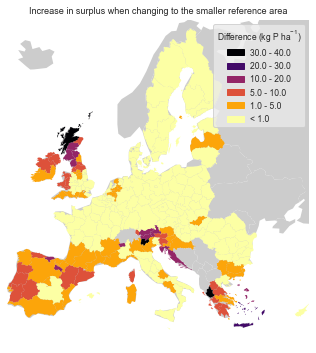

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
(
    nuts_geo[['geometry']]
    .join(surplus_diff, how='inner')
    .pipe(
        plotting.plot_europe_choropleth,
        'diff',
        bin_uls=[1, 5, 10, 20, 30, 40,],
        cmap=mpl.cm.inferno_r,
        ax=ax,
    )
)
ax.get_legend().set_title('Difference (kg P ha$^{-1}$)')
ax.set_title('Increase in surplus when changing to the smaller reference area')
fig.savefig('outdata/figures/reference-area-surplus-change.pdf', bbox_inches='tight')

# Why is Eurostat's surplus for Italy so much lower than ours?

Let's inspect data for Spain and France for comparison.

The most striking difference is that Italy's P harvest in fruit averages 9 kg P/ha UAA. Since fruit (including citrus) covers only 4% of Italy's UAA, this would correspond to a fruit P yield of > 200 kg P / ha. This is probably an error and the main cause that our balances are so different.

In [25]:
# Calculate major outputs per ha UAA (national average)
(
    eurostat_gnb
    .loc[['IT', 'ES', 'FR']]
    .pipe(lambda d: d.div(d.UAA, axis=0))
    .T
    .loc[lambda s: s.index.str.startswith('O_')]
    .join(eust.read_table_metadata('aei_pr_gnb')['dimensions'].loc['indic_ag'])
    .set_index('label')
    .round(2)
)

,IT,ES,FR
label,,,
Nutrient removal by crop residues burned on the field (tonnes of nutrient),NaN,0.61,0.00
Nutrient removal by harvest of crops (tonnes of nutrient),15.32,5.84,8.75
Nutrient removal by harvest of cereals (tonnes of nutrient),4.99,3.57,6.74
Nutrient removal by harvest of fruits (tonnes of nutrient),8.93,1.42,0.14
Nutrient removal by harvest of industrial crops (tonnes of nutrient),0.55,0.35,1.26
Nutrient removal by harvest of ornamental crops (tonnes of nutrient),NaN,0.03,0.00
Nutrient removal by harvest of other crops (tonnes of nutrient),NaN,0.00,0.00
Nutrient removal by harvest of dried pulses (tonnes of nutrient),0.04,0.11,0.11
Nutrient removal by harvest of root crops (tonnes of nutrient),0.16,0.05,0.38


In [26]:
areas = (
    eust.read_table_data('ef_lus_allcrops')
    .value
    .xs('HA', level='unit')
    .xs('TOTAL', level='agrarea')
    .xs('IT', level='geo')
    .xs(2013, level='time')
    .rename('Area')
    .to_frame()
    .join(eust.read_table_metadata('ef_lus_allcrops')['dimensions'].loc['crops'], on='crops')
    .assign(**{'Area share': lambda d: d.Area / d.Area.loc['UAA']})
    .reset_index()
    .set_index(['crops', 'label'])
    .loc[['UAA', 'ARA', 'PECR', 'J0000', 'F0000', 'T0000']]
)
areas

,,Area,Area share
crops,label,,
ARA,Arable land,6728360.0,0.556114
F0000,"Fruits, berries and nuts (excluding citrus fruits, grapes and strawberries)",377470.0,0.031199
J0000,Permanent grassland,3316430.0,0.274110
PECR,Permanent crops,2032310.0,0.167975
T0000,Citrus fruits,120180.0,0.009933
UAA,Utilised Agricultural Area,12098890.0,1.000000
